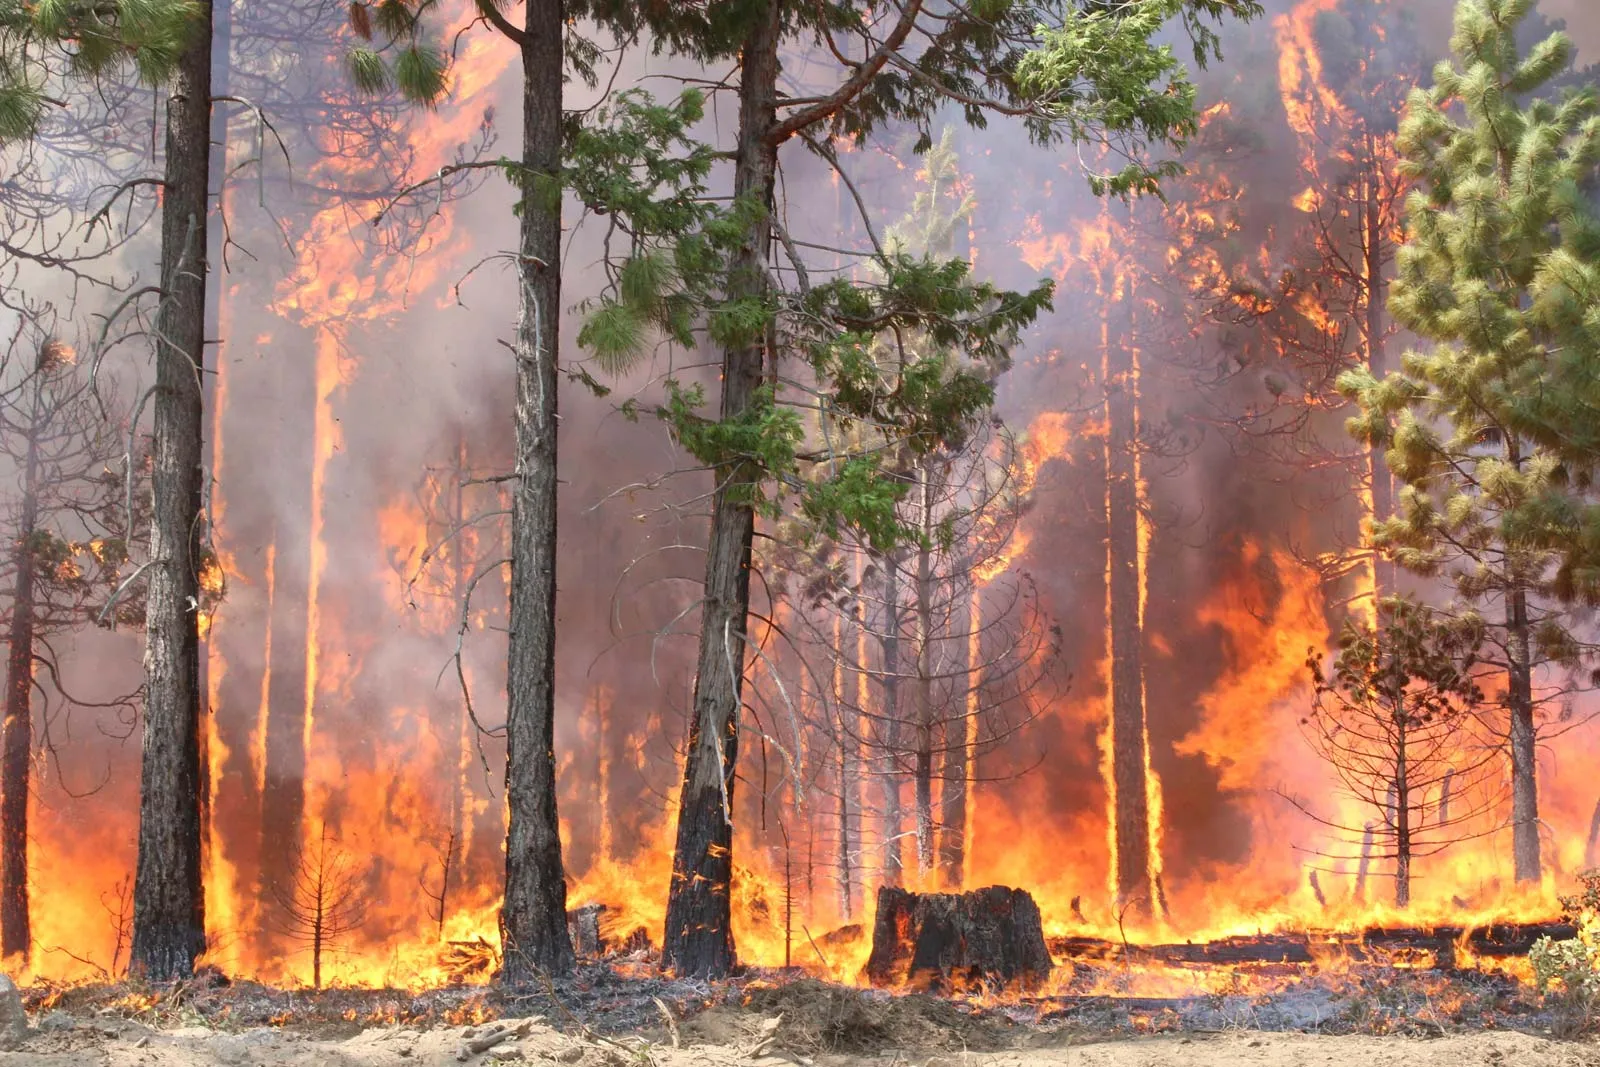

# Data Set Information:

The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

122 instances for each region.

The period from June 2012 to September 2012.
The dataset includes 11 attribues and 1 output attribue (class)
The 244 instances have been classified into â€˜fireâ€™ (138 classes) and â€˜not fireâ€™ (106 classes) classes.

# Attribute Information:

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012) Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8 FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely â€œFireâ€ and â€œnot Fireâ€

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# ML libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, recall_score,precision_score,f1_score

# To save
import pickle

In [4]:
data=pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv',header=1)
data

day month  year Temperature  RH  Ws Rain   FFMC  DMC    DC  ISI   BUI  \
0     1     6  2012          29  57  18     0  65.7  3.4   7.6  1.3   3.4   
1     2     6  2012          29  61  13   1.3  64.4  4.1   7.6    1   3.9   
2     3     6  2012          26  82  22  13.1  47.1  2.5   7.1  0.3   2.7   
3     4     6  2012          25  89  13   2.5  28.6  1.3   6.9    0   1.7   
4     5     6  2012          27  77  16     0  64.8    3  14.2  1.2   3.9   
..   ..   ...   ...         ...  ..  ..   ...   ...  ...   ...  ...   ...   
242  26     9  2012          30  65  14     0  85.4   16  44.5  4.5  16.9   
243  27     9  2012          28  87  15   4.4  41.1  6.5     8  0.1   6.2   
244  28     9  2012          27  87  29   0.5  45.9  3.5   7.9  0.4   3.4   
245  29     9  2012          24  54  18   0.1  79.7  4.3  15.2  1.7   5.1   
246  30     9  2012          24  64  15   0.2  67.3  3.8  16.5  1.2   4.8   

     FWI     Classes    
0    0.5   not fire     
1    0.4   not fire     
2    0.1   not fire     
3      0   not fire     
4    0.5   not fire     
..   ...           ...  
242  6.5       fire     
243    0   not fire     
244  0.2   not fire     
245  0.7   not fire     
246  0.5  not fire      

[247 rows x 14 columns]

In [5]:
data.iloc[121:]

day  month  year  Temperature   RH   Ws  Rain   \
121                             30      9  2012           25   78   14    1.4   
122                            NaN    NaN   NaN          NaN  NaN  NaN    NaN   
123  Sidi-Bel Abbes Region Dataset    NaN   NaN          NaN  NaN  NaN    NaN   
124                            day  month  year  Temperature   RH   Ws  Rain    
125                              1      6  2012           32   71   12    0.7   
..                             ...    ...   ...          ...  ...  ...    ...   
242                             26      9  2012           30   65   14      0   
243                             27      9  2012           28   87   15    4.4   
244                             28      9  2012           27   87   29    0.5   
245                             29      9  2012           24   54   18    0.1   
246                             30      9  2012           24   64   15    0.2   

     FFMC  DMC    DC  ISI   BUI  FWI     Classes    
121    45  1.9   7.5  0.2   2.4  0.1   not fire     
122   NaN  NaN   NaN  NaN   NaN  NaN           NaN  
123   NaN  NaN   NaN  NaN   NaN  NaN           NaN  
124  FFMC  DMC    DC  ISI   BUI  FWI     Classes    
125  57.1  2.5   8.2  0.6   2.8  0.2   not fire     
..    ...  ...   ...  ...   ...  ...           ...  
242  85.4   16  44.5  4.5  16.9  6.5       fire     
243  41.1  6.5     8  0.1   6.2    0   not fire     
244  45.9  3.5   7.9  0.4   3.4  0.2   not fire     
245  79.7  4.3  15.2  1.7   5.1  0.7   not fire     
246  67.3  3.8  16.5  1.2   4.8  0.5  not fire      

[126 rows x 14 columns]

# Merging and reseting index

In [6]:
data.drop(index=[122,123,124],axis=1,inplace=True)

In [7]:
data=data.reset_index()

# Creating region feature

In [8]:
data.loc[:122,'Region']=0
data.loc[122:,'Region']=1
data

index day month  year Temperature  RH  Ws Rain   FFMC  DMC    DC  ISI  \
0        0   1     6  2012          29  57  18     0  65.7  3.4   7.6  1.3   
1        1   2     6  2012          29  61  13   1.3  64.4  4.1   7.6    1   
2        2   3     6  2012          26  82  22  13.1  47.1  2.5   7.1  0.3   
3        3   4     6  2012          25  89  13   2.5  28.6  1.3   6.9    0   
4        4   5     6  2012          27  77  16     0  64.8    3  14.2  1.2   
..     ...  ..   ...   ...         ...  ..  ..   ...   ...  ...   ...  ...   
239    242  26     9  2012          30  65  14     0  85.4   16  44.5  4.5   
240    243  27     9  2012          28  87  15   4.4  41.1  6.5     8  0.1   
241    244  28     9  2012          27  87  29   0.5  45.9  3.5   7.9  0.4   
242    245  29     9  2012          24  54  18   0.1  79.7  4.3  15.2  1.7   
243    246  30     9  2012          24  64  15   0.2  67.3  3.8  16.5  1.2   

      BUI  FWI     Classes    Region  
0     3.4  0.5   not fire        0.0  
1     3.9  0.4   not fire        0.0  
2     2.7  0.1   not fire        0.0  
3     1.7    0   not fire        0.0  
4     3.9  0.5   not fire        0.0  
..    ...  ...           ...     ...  
239  16.9  6.5       fire        1.0  
240   6.2    0   not fire        1.0  
241   3.4  0.2   not fire        1.0  
242   5.1  0.7   not fire        1.0  
243   4.8  0.5  not fire         1.0  

[244 rows x 16 columns]

# Checking for null values

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        244 non-null    int64  
 1   day          244 non-null    object 
 2   month        244 non-null    object 
 3   year         244 non-null    object 
 4   Temperature  244 non-null    object 
 5    RH          244 non-null    object 
 6    Ws          244 non-null    object 
 7   Rain         244 non-null    object 
 8   FFMC         244 non-null    object 
 9   DMC          244 non-null    object 
 10  DC           244 non-null    object 
 11  ISI          244 non-null    object 
 12  BUI          244 non-null    object 
 13  FWI          244 non-null    object 
 14  Classes      244 non-null    object 
 15  Region       244 non-null    float64
dtypes: float64(1), int64(1), object(14)
memory usage: 30.6+ KB


In [10]:
data.isnull().sum()

index          0
day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [11]:
data.describe(include='all')

index  day month  year Temperature   RH   Ws Rain   FFMC  DMC  \
count   244.00000  244   244   244         244  244  244   244   244  244   
unique        NaN   31     4     1          19   62   18    39   173  166   
top           NaN    1     7  2012          35   64   14     0  88.9  7.9   
freq          NaN    8    62   244          29   10   43   133     8    5   
mean    123.00000  NaN   NaN   NaN         NaN  NaN  NaN   NaN   NaN  NaN   
std      71.88657  NaN   NaN   NaN         NaN  NaN  NaN   NaN   NaN  NaN   
min       0.00000  NaN   NaN   NaN         NaN  NaN  NaN   NaN   NaN  NaN   
25%      60.75000  NaN   NaN   NaN         NaN  NaN  NaN   NaN   NaN  NaN   
50%     123.00000  NaN   NaN   NaN         NaN  NaN  NaN   NaN   NaN  NaN   
75%     185.25000  NaN   NaN   NaN         NaN  NaN  NaN   NaN   NaN  NaN   
max     246.00000  NaN   NaN   NaN         NaN  NaN  NaN   NaN   NaN  NaN   

         DC  ISI  BUI  FWI Classes        Region  
count   244  244  244  244       244  244.000000  
unique  198  106  174  126         8         NaN  
top       8  1.1    3  0.4   fire            NaN  
freq      5    8    5   12       132         NaN  
mean    NaN  NaN  NaN  NaN       NaN    0.500000  
std     NaN  NaN  NaN  NaN       NaN    0.501028  
min     NaN  NaN  NaN  NaN       NaN    0.000000  
25%     NaN  NaN  NaN  NaN       NaN    0.000000  
50%     NaN  NaN  NaN  NaN       NaN    0.500000  
75%     NaN  NaN  NaN  NaN       NaN    1.000000  
max     NaN  NaN  NaN  NaN       NaN    1.000000

In [12]:
data.columns

Index(['index', 'day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [13]:
#some column names have extra spaces. we will remove those
data.columns=data.columns.str.strip()
data.columns

Index(['index', 'day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [14]:
# removing extra spaces from classes feature
data.Classes=data.Classes.str.strip()

In [15]:
data['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

In [16]:
data.loc[165]

index             168
day                14
month               7
year             2012
Temperature        37
RH                 37
Ws                 18
Rain              0.2
FFMC             88.9
DMC              12.9
DC             14.6 9
ISI              12.5
BUI              10.4
FWI               4.8
Classes          fire
Region            1.0
Name: 165, dtype: object

In [17]:
#replacing incorrect number
data.replace('14.6 9','14.69',inplace=True)

In [18]:
data.loc[165]

index            168
day               14
month              7
year            2012
Temperature       37
RH                37
Ws                18
Rain             0.2
FFMC            88.9
DMC             12.9
DC             14.69
ISI             12.5
BUI             10.4
FWI              4.8
Classes         fire
Region           1.0
Name: 165, dtype: object

# Droping unwanted column

In [19]:
data.drop(['year','index'],axis=1,inplace=True)

In [20]:
data

day month Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI   BUI  FWI  \
0     1     6          29  57  18     0  65.7  3.4   7.6  1.3   3.4  0.5   
1     2     6          29  61  13   1.3  64.4  4.1   7.6    1   3.9  0.4   
2     3     6          26  82  22  13.1  47.1  2.5   7.1  0.3   2.7  0.1   
3     4     6          25  89  13   2.5  28.6  1.3   6.9    0   1.7    0   
4     5     6          27  77  16     0  64.8    3  14.2  1.2   3.9  0.5   
..   ..   ...         ...  ..  ..   ...   ...  ...   ...  ...   ...  ...   
239  26     9          30  65  14     0  85.4   16  44.5  4.5  16.9  6.5   
240  27     9          28  87  15   4.4  41.1  6.5     8  0.1   6.2    0   
241  28     9          27  87  29   0.5  45.9  3.5   7.9  0.4   3.4  0.2   
242  29     9          24  54  18   0.1  79.7  4.3  15.2  1.7   5.1  0.7   
243  30     9          24  64  15   0.2  67.3  3.8  16.5  1.2   4.8  0.5   

      Classes  Region  
0    not fire     0.0  
1    not fire     0.0  
2    not fire     0.0  
3    not fire     0.0  
4    not fire     0.0  
..        ...     ...  
239      fire     1.0  
240  not fire     1.0  
241  not fire     1.0  
242  not fire     1.0  
243  not fire     1.0  

[244 rows x 14 columns]

# Label encoding

In [21]:
#importing Label encoading from sklearn.preprocessing
from sklearn.preprocessing import LabelEncoder
LabelEncoder = LabelEncoder()

In [22]:
data['Classes'] = LabelEncoder.fit_transform(data['Classes'])
data

day month Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI   BUI  FWI  \
0     1     6          29  57  18     0  65.7  3.4   7.6  1.3   3.4  0.5   
1     2     6          29  61  13   1.3  64.4  4.1   7.6    1   3.9  0.4   
2     3     6          26  82  22  13.1  47.1  2.5   7.1  0.3   2.7  0.1   
3     4     6          25  89  13   2.5  28.6  1.3   6.9    0   1.7    0   
4     5     6          27  77  16     0  64.8    3  14.2  1.2   3.9  0.5   
..   ..   ...         ...  ..  ..   ...   ...  ...   ...  ...   ...  ...   
239  26     9          30  65  14     0  85.4   16  44.5  4.5  16.9  6.5   
240  27     9          28  87  15   4.4  41.1  6.5     8  0.1   6.2    0   
241  28     9          27  87  29   0.5  45.9  3.5   7.9  0.4   3.4  0.2   
242  29     9          24  54  18   0.1  79.7  4.3  15.2  1.7   5.1  0.7   
243  30     9          24  64  15   0.2  67.3  3.8  16.5  1.2   4.8  0.5   

     Classes  Region  
0          1     0.0  
1          1     0.0  
2          1     0.0  
3          1     0.0  
4          1     0.0  
..       ...     ...  
239        0     1.0  
240        1     1.0  
241        1     1.0  
242        1     1.0  
243        1     1.0  

[244 rows x 14 columns]

# Converting datatypes

In [23]:
# changing datatypes of features t0 numerical from object
convert={'day':'int64', 'month':'int64', 'Temperature':'int64', 'RH':'int64', 'Ws':'int64',
                  'Rain':'float64', 'FFMC':'float64', 'DMC':'float64','DC':'float64','ISI':'float64', 'BUI':'float64',
                  'FWI':'float64', 'Classes':'int64', 'Region':'float64'}

data=data.astype(convert)
data.dtypes

day              int64
month            int64
Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes          int64
Region         float64
dtype: object

# Shape of data

In [24]:
data.shape

(244, 14)

# Value count to check for balanced and imbalanced data

In [25]:
data.Classes.value_counts()

0    138
1    106
Name: Classes, dtype: int64

# Creating a copy of the dataset

In [26]:
dataset=data.copy()
dataset

day  month  Temperature  RH  Ws  Rain  FFMC   DMC    DC  ISI   BUI  FWI  \
0      1      6           29  57  18   0.0  65.7   3.4   7.6  1.3   3.4  0.5   
1      2      6           29  61  13   1.3  64.4   4.1   7.6  1.0   3.9  0.4   
2      3      6           26  82  22  13.1  47.1   2.5   7.1  0.3   2.7  0.1   
3      4      6           25  89  13   2.5  28.6   1.3   6.9  0.0   1.7  0.0   
4      5      6           27  77  16   0.0  64.8   3.0  14.2  1.2   3.9  0.5   
..   ...    ...          ...  ..  ..   ...   ...   ...   ...  ...   ...  ...   
239   26      9           30  65  14   0.0  85.4  16.0  44.5  4.5  16.9  6.5   
240   27      9           28  87  15   4.4  41.1   6.5   8.0  0.1   6.2  0.0   
241   28      9           27  87  29   0.5  45.9   3.5   7.9  0.4   3.4  0.2   
242   29      9           24  54  18   0.1  79.7   4.3  15.2  1.7   5.1  0.7   
243   30      9           24  64  15   0.2  67.3   3.8  16.5  1.2   4.8  0.5   

     Classes  Region  
0          1     0.0  
1          1     0.0  
2          1     0.0  
3          1     0.0  
4          1     0.0  
..       ...     ...  
239        0     1.0  
240        1     1.0  
241        1     1.0  
242        1     1.0  
243        1     1.0  

[244 rows x 14 columns]

# Univariate analysis

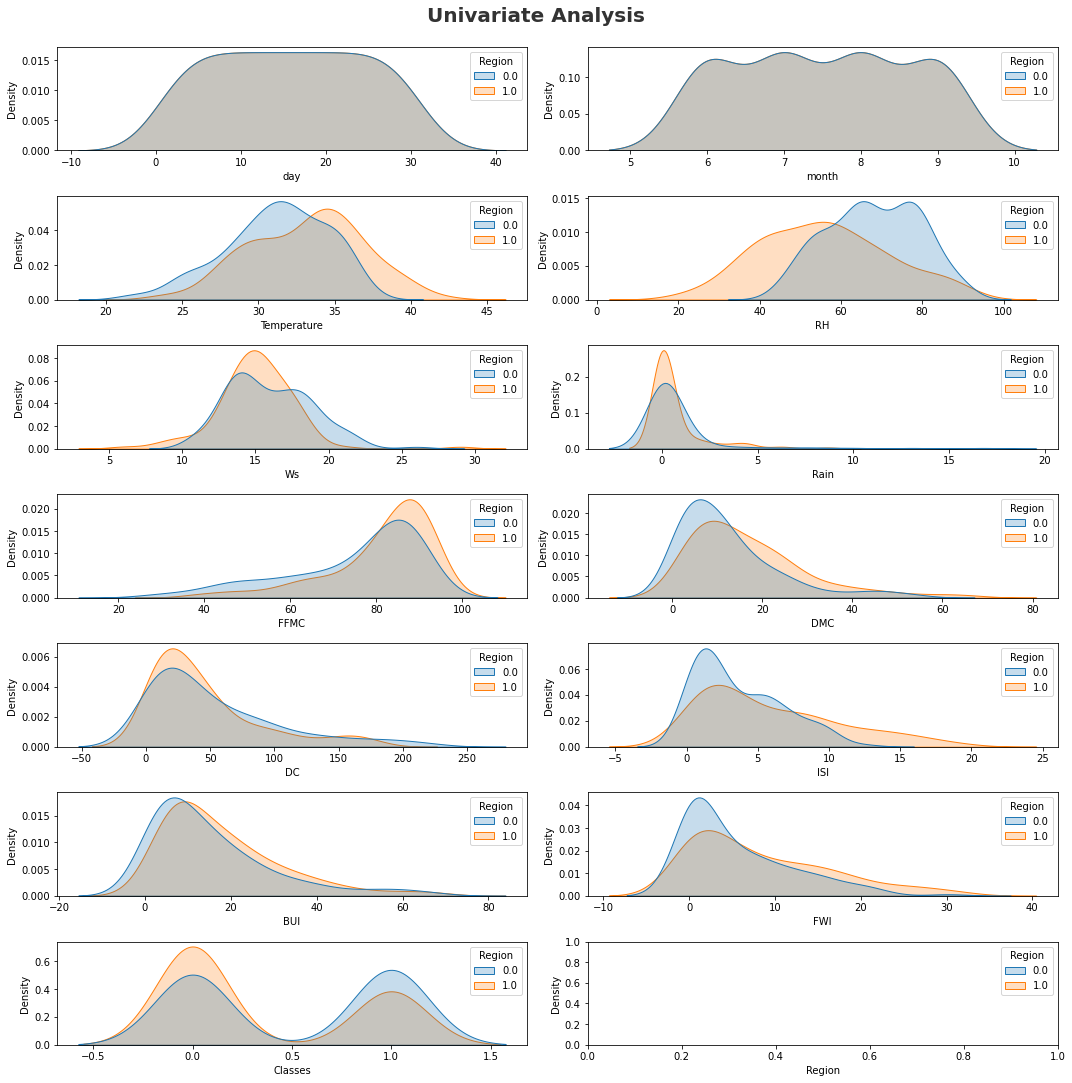

In [72]:
plt.figure(figsize=(15,15))
plt.suptitle('Univariate Analysis', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(dataset.columns)):
    plt.subplot(7, 2, i+1)
    sns.kdeplot(x=dataset[dataset.columns[i]],shade=True, color='b',hue='Region',data=dataset)
    plt.xlabel(dataset.columns[i])
    plt.tight_layout()

In [ ]:
#Observation:Most of the graphs are skewed

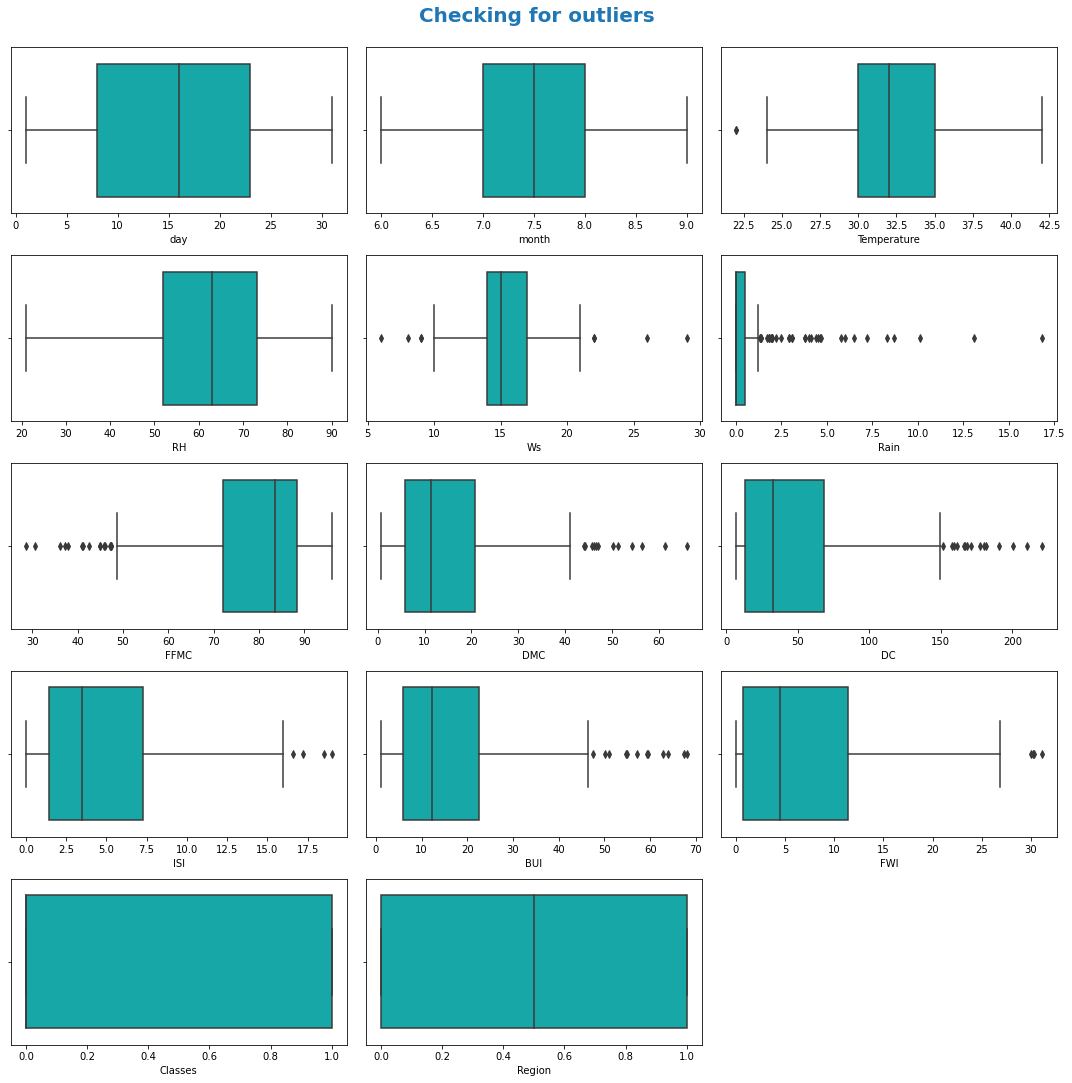

In [73]:
plt.figure(figsize=(15, 15))
plt.suptitle('Checking for outliers', fontsize=20,fontweight='bold',y=1.,color='C0')

for i in range(0, len(dataset.columns)):
    plt.subplot(5, 3, i+1)
    sns.boxplot(x=dataset[dataset.columns[i]],color='c')
    plt.xlabel(dataset.columns[i])
    plt.tight_layout()

In [ ]:
#observation
Temperature,Ws,FFMC,DMC,DC,ISI,BUI,FWI,Rain has outliers

# Bivariate analysis

<AxesSubplot:xlabel='Classes', ylabel='count'>

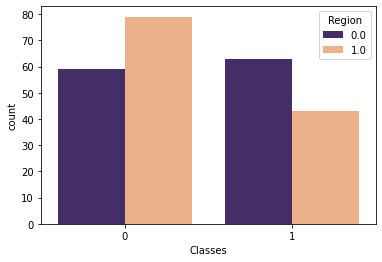

In [64]:
# Here 0, 1 is not fire and fire 
# Here 0.0 and 1.0 is Bejaia region and Sidi Bel-abbes region 
pie_data=dataset.groupby(['Classes','Region']).agg({'Classes':['count']})
pie_data
sns.countplot(data=dataset, x='Classes', hue='Region',palette=['#432371',"#FAAE7B"])

In [ ]:
#observation:
1)Sidi Bel-abbes region has more occurance of fire than Bejaia region.
2)There are more cases of fire than not fire.

# Multivariate analysis

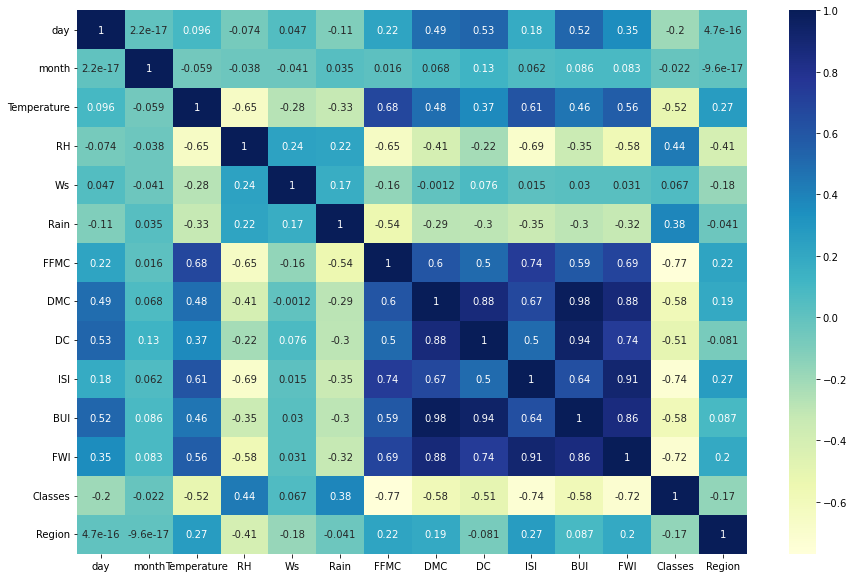

In [65]:
plt.figure(figsize=(15,10))
sns.heatmap(dataset.corr(),annot=True, cmap="YlGnBu")
plt.show()

# Independent variable vs Target variable

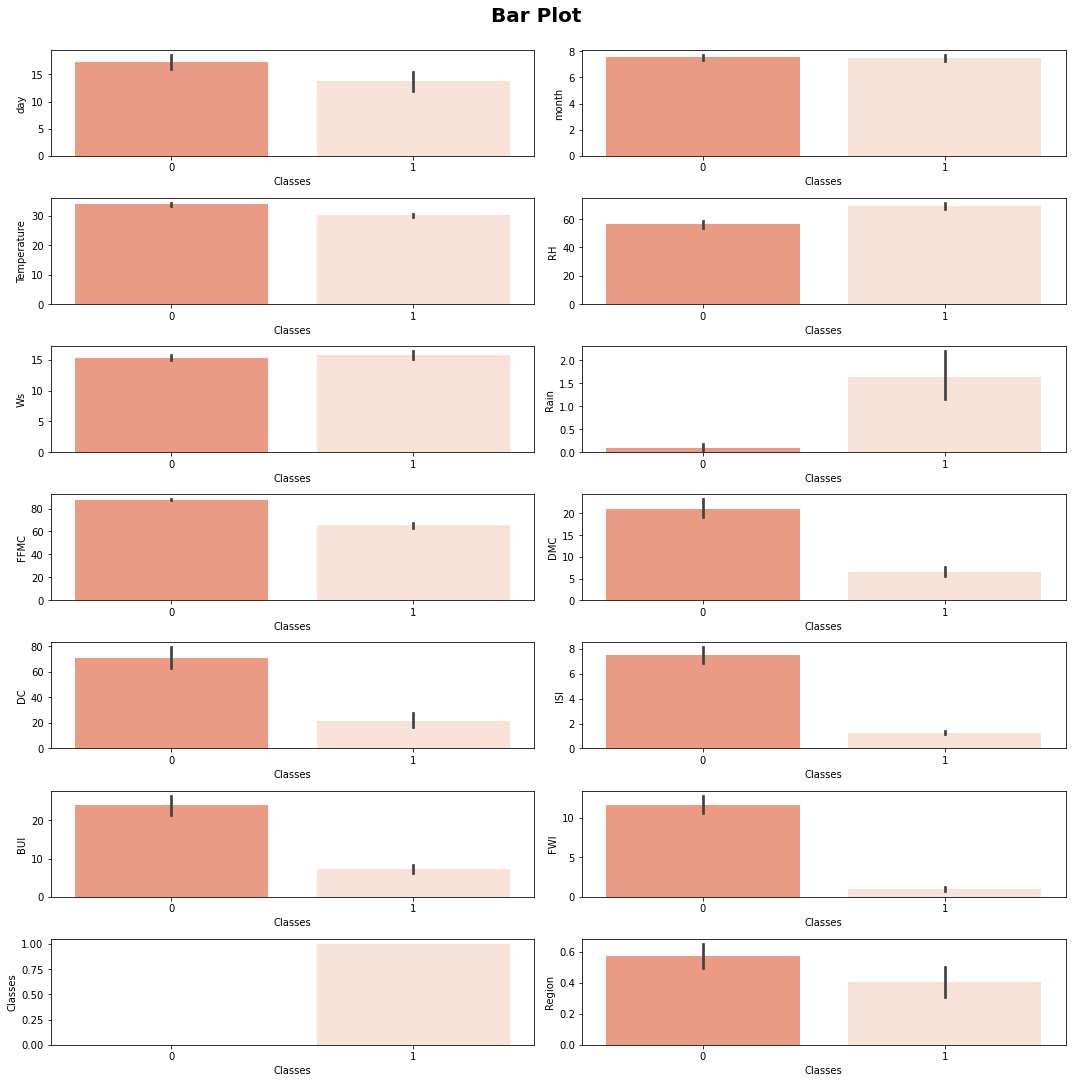

In [191]:
plt.figure(figsize=(15, 15))
plt.suptitle('Bar Plot', fontsize=20, fontweight='bold', alpha=1, y=1)

for i in range(0, len(dataset.columns)):
    plt.subplot(7,2,i+1)
    sns.barplot(y=dataset.columns[i], x='Classes', data=dataset,palette=["#fc9272","#fee0d2"])
    plt.tight_layout()

# Splitting independent and target variables

In [27]:
X = dataset[['Temperature', 'RH', 'Ws','Rain','FFMC','DMC','DC', 'ISI','BUI','FWI','Region']]
X

Temperature  RH  Ws  Rain  FFMC   DMC    DC  ISI   BUI  FWI  Region
0             29  57  18   0.0  65.7   3.4   7.6  1.3   3.4  0.5     0.0
1             29  61  13   1.3  64.4   4.1   7.6  1.0   3.9  0.4     0.0
2             26  82  22  13.1  47.1   2.5   7.1  0.3   2.7  0.1     0.0
3             25  89  13   2.5  28.6   1.3   6.9  0.0   1.7  0.0     0.0
4             27  77  16   0.0  64.8   3.0  14.2  1.2   3.9  0.5     0.0
..           ...  ..  ..   ...   ...   ...   ...  ...   ...  ...     ...
239           30  65  14   0.0  85.4  16.0  44.5  4.5  16.9  6.5     1.0
240           28  87  15   4.4  41.1   6.5   8.0  0.1   6.2  0.0     1.0
241           27  87  29   0.5  45.9   3.5   7.9  0.4   3.4  0.2     1.0
242           24  54  18   0.1  79.7   4.3  15.2  1.7   5.1  0.7     1.0
243           24  64  15   0.2  67.3   3.8  16.5  1.2   4.8  0.5     1.0

[244 rows x 11 columns]

In [28]:
y=dataset['Classes']
y

0      1
1      1
2      1
3      1
4      1
      ..
239    0
240    1
241    1
242    1
243    1
Name: Classes, Length: 244, dtype: int64

# Splitting train and test data

In [72]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [73]:
X_train

Temperature  RH  Ws  Rain  FFMC   DMC    DC   ISI   BUI   FWI  Region
61            36  45  14   0.0  78.8   4.8  10.2   2.0   4.7   0.9     0.0
146           34  70  16   0.0  86.0  12.8  25.6   5.4  12.7   6.7     1.0
52            27  66  22   0.4  68.2  10.5  71.3   1.8  15.4   2.1     0.0
66            32  75  14   0.0  86.4  13.0  39.1   5.2  14.2   6.8     0.0
26            34  53  18   0.0  89.0  21.6  80.3   9.2  25.8  15.0     0.0
..           ...  ..  ..   ...   ...   ...   ...   ...   ...   ...     ...
67            32  69  16   0.0  86.5  15.5  48.6   5.5  17.2   8.0     0.0
192           39  39  15   0.2  89.3  15.8  35.4   8.2  15.8  10.7     1.0
117           31  54  11   0.0  82.0   6.0  16.3   2.5   6.2   1.7     0.0
47            31  68  14   0.0  85.4  12.1  43.1   4.6  14.2   6.0     0.0
172           36  29  18   0.0  93.9  39.6  80.6  18.5  39.5  30.0     1.0

[170 rows x 11 columns]

In [74]:
y_train

61     1
146    0
52     1
66     0
26     0
      ..
67     0
192    0
117    1
47     0
172    0
Name: Classes, Length: 170, dtype: int64

In [75]:
X_test

Temperature  RH  Ws  Rain  FFMC   DMC     DC   ISI   BUI   FWI  Region
64            34  69  13   0.0  85.0   8.2   19.8   4.0   8.2   3.9     0.0
63            35  63  14   0.3  76.6   5.7   10.0   1.7   5.5   0.8     0.0
55            36  53  19   0.0  89.2  17.1   98.6  10.0  23.9  15.3     0.0
111           28  84  18   0.0  83.8  13.5   49.3   4.5  16.0   6.3     0.0
225           31  72  14   0.0  84.2   8.3   25.2   3.8   9.1   3.9     1.0
..           ...  ..  ..   ...   ...   ...    ...   ...   ...   ...     ...
90            35  70  17   0.8  72.7  25.2  180.4   1.7  37.4   4.2     0.0
101           33  73  12   1.8  59.9   2.2    8.9   0.7   2.7   0.3     0.0
75            36  55  13   0.3  82.4  15.6   92.5   3.7  22.0   6.3     0.0
4             27  77  16   0.0  64.8   3.0   14.2   1.2   3.9   0.5     0.0
109           32  49  11   0.0  89.4   9.8   33.1   6.8  11.3   7.7     0.0

[74 rows x 11 columns]

In [76]:
y_test

64     0
63     1
55     0
111    0
225    0
      ..
90     1
101    1
75     0
4      1
109    0
Name: Classes, Length: 74, dtype: int64

# Logistic Regression

In [77]:
logreg=LogisticRegression()
logreg

LogisticRegression()

In [78]:
logreg.fit(X_train,y_train)

LogisticRegression()

In [79]:
print('Coefficient is-',logreg.coef_)
print('Intercept is-',logreg.intercept_)

Coefficient is- [[ 0.31608786  0.01297914  0.30417106 -0.48056512 -0.10344614  0.21826974
  -0.02503791 -1.37636299  0.14121919 -1.86139434 -0.61751627]]
Intercept is- [0.13783299]


In [80]:
y_pred=logreg.predict(X_test)
y_pred

array([0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0], dtype=int64)

In [90]:
dataset = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
dataset.head(40)

Actual  Predicted
64        0          0
63        1          1
55        0          0
111       0          0
225       0          0
92        1          1
76        0          1
181       0          0
188       1          1
180       0          0
73        0          0
107       1          1
150       0          0
198       0          0
224       1          1
44        1          1
145       0          0
110       0          0
243       1          1
189       1          1
210       1          1
104       1          1
138       1          1
8         1          1
199       0          0
203       0          0
220       0          0
125       1          1
5         0          0
22        0          0
74        0          0
124       1          1
12        1          1
168       0          0
45        1          1
158       0          0
37        0          0
136       1          1
212       0          0
223       1          1

# Accuracy
Accuracy score is used to measure the model performance by measuring the ratio of sum of true positive and 
true negatives out of all the predictions made.

FORMULA:- Accuracy score=(TP+TN)/(TP+TN+FP+FN)

In [82]:
print("Accuracy of Logistic Regression is",accuracy_score(y_test,y_pred))

Accuracy of Logistic Regression is 0.972972972972973


# Confusion matrix
It is a table that is used in classification problems to assess where errors in the model were made.
The rows represent the actual classes the outcomes should have been. While the columns represent the predictions 
we have made. Using this table it is easy to see which predictions are wrong.

In [91]:
conf_mat=confusion_matrix(y_test,y_pred)
conf_mat

array([[38,  2],
       [ 0, 34]], dtype=int64)

# Precision score
Precision is defined as the number of true positives over the number of true positives plus the number of false positives. Of the positives predicted, what percentage is truly positive?
i.e) Of the positives predicted, what percentage is truly positive?

In [84]:
print(precision_score(y_test,y_pred,average=None))

[1.         0.94444444]


# Recall score
Recall is defined as the number of true positives over the number of true positives plus the number of false negatives.
i.e) Of all the positive cases, what percentage are predicted positive?

In [85]:
print(recall_score(y_test,y_pred,average=None))

[0.95 1.  ]


# F1 score
F1 score is defined as the harmonic mean of precision and recall.
Formula:- 2 * ((Precision * Sensitivity) / (Precision + Sensitivity))

In [87]:
print(f1_score(y_test,y_pred,average=None))

[0.97435897 0.97142857]


# Classification report

In [88]:
print((classification_report(y_test,y_pred)))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        40
           1       0.94      1.00      0.97        34

    accuracy                           0.97        74
   macro avg       0.97      0.97      0.97        74
weighted avg       0.97      0.97      0.97        74



# Summary

In [89]:
from tabulate import tabulate
print("For Logistic regression Model")
cdf = pd.DataFrame(confusion_matrix(y_test,y_pred),columns=list(range(0,2)))
print(tabulate(cdf))
print("Precision-",precision_score(y_test,y_pred))
print("Recall-",recall_score(y_test,y_pred))
print("F1 score-",f1_score(y_test,y_pred))

For Logistic regression Model
-  --  --
0  38   2
1   0  34
-  --  --
Precision- 0.9444444444444444
Recall- 1.0
F1 score- 0.9714285714285714


                                            **END**